<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.981 · TFM · Aula 1</p>
<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'informàtica, multimèdia i telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>
<div style="text-align: center; margin-top: 40px;">
    <h1>Aplicación para ayuda a la conducción con deep learning</h1>
</div>

### ARCHIVO 13: Pruebas clasificación de semáforos

Código que pone a prueba los modelos entrenados anteriormente con imágenes de archivo.

Código ejecutado en plataforma Visual Studio Code.

In [ ]:
# Llibreries

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
from collections import deque, Counter

In [ ]:
# Models

model_det = YOLO("Models/Detect_Signs.pt")                           # Model que detecta Símbols
model_sem = torch.load("Models/TrafficLight.pt", map_location="cpu") # Model que classifica semàfors
model_sem.eval()

# Transformació per model_bra
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


0: 480x640 1 traffic light, 1 stop sign, 47.0ms
Speed: 4.6ms preprocess, 47.0ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)


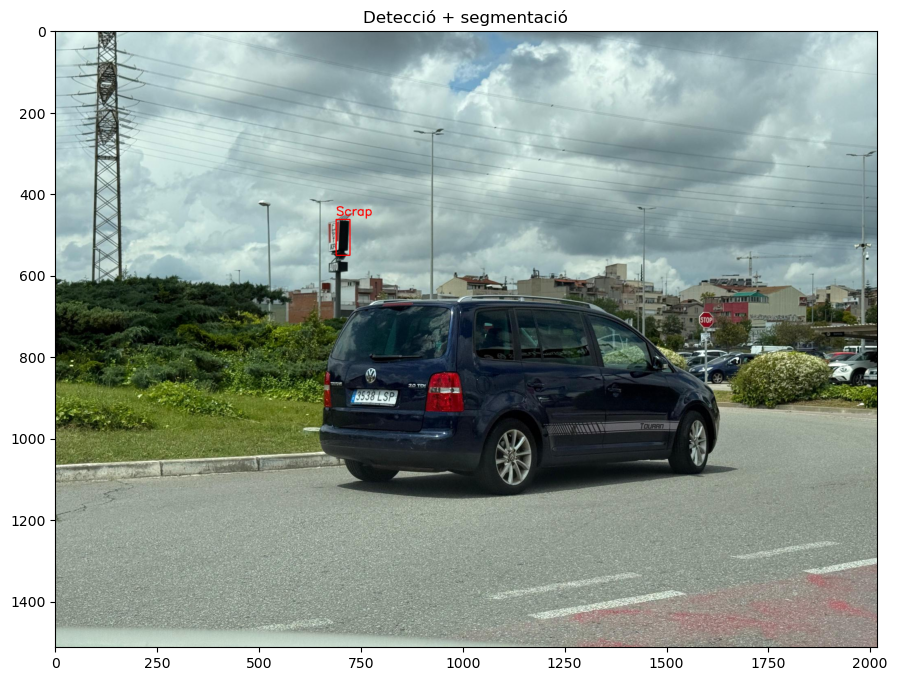

In [ ]:
# Imatge a tractar
frame = cv2.imread("foto1.jpg")

# Detecció
results = model_det(frame)[0]

# Llista de noms de classe del model de classificació
class_names = ["Scrap", "Verd", "Ignorar", "Vermell", "Groc"]

for box in results.boxes:

    cls = int(box.cls[0])
    conf = float(box.conf[0])
    
    if cls == 0:  # Si és semàfor, classifica
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

        # Regió del semàfor a classificar
        roi = frame[y1:y2, x1:x2]

        # Classificació amb EfficientNet
        img_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        input_tensor = transform(img_pil).unsqueeze(0)

        # Classificació
        with torch.no_grad():
            output = model_sem(input_tensor)
            pred = torch.argmax(output, dim=1).item()
            classe = class_names[pred]

        # Mostra resultat
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(frame, classe, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Correcció BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Mostra la imatge
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)
plt.title("Detecció + segmentació")
plt.show()


0: 480x640 4 traffic lights, 51.5ms
Speed: 14.8ms preprocess, 51.5ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


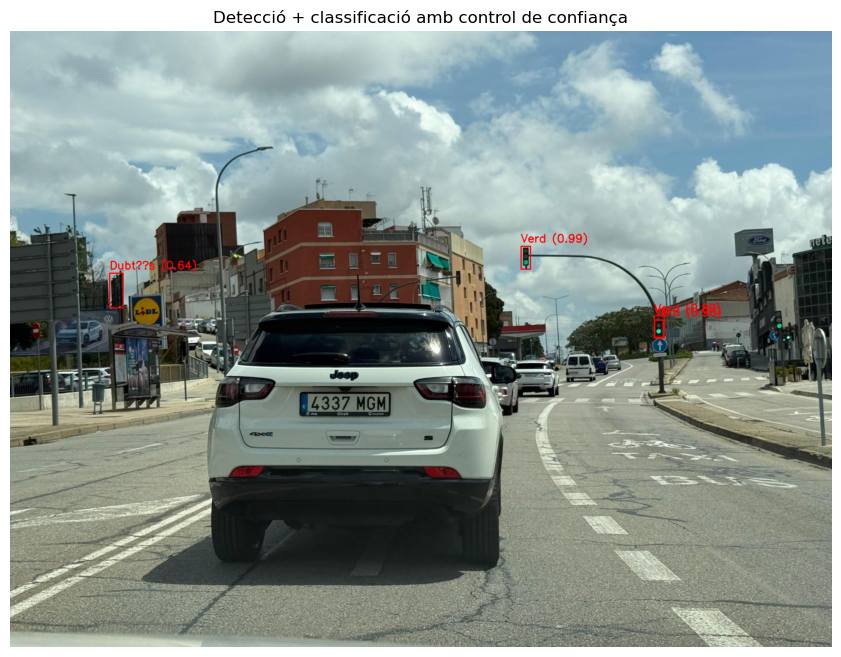

In [ ]:
# Imatge a tractar
frame = cv2.imread("3.jpg")

# Detecció
results = model_det(frame)[0]

# Llista de noms de classe del model de classificació
class_names = ["Scrap", "Verd", "Ignorar", "Vermell", "Groc"]

for box in results.boxes:

    cls = int(box.cls[0])
    conf = float(box.conf[0])
    
    if cls == 0:  # Si és semàfor, classifica
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

        # Regió del semàfor a classificar
        roi = frame[y1:y2, x1:x2]

        # Classificació amb EfficientNet
        img_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        input_tensor = transform(img_pil).unsqueeze(0)

        # Classificació
        with torch.no_grad():
            output = model_sem(input_tensor)
            pred = torch.argmax(output, dim=1).item()
            classe = class_names[pred]

        # Mostra resultat
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(frame, classe, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Correcció BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Mostra la imatge
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)
plt.title("Detecció + classificació amb control de confiança")
plt.axis("off")
plt.show()


In [ ]:
# Vídeo a tractar
video_path = "Media/v2.mp4"
cap = cv2.VideoCapture(video_path)

# Sortida
out = cv2.VideoWriter("v2semafor.mp4",
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Per fotograma
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detecció semàfors
    results = model_det(frame)[0]

    # Llista de noms de classe del model de classificació
    class_names = ["Scrap", "Verd", "Ignorar", "Vermell", "Groc"]

    for box in results.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
    
        if cls == 0:  # Si és semàfor, classifica
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            x1, y1 = max(x1, 0), max(y1, 0)
            x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

            roi = frame[y1:y2, x1:x2]

            # Classificació amb EfficientNet
            img_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            input_tensor = transform(img_pil).unsqueeze(0)

            # Classificació
            with torch.no_grad():
                output = model_sem(input_tensor)
                pred = torch.argmax(output, dim=1).item()
                classe = class_names[pred]

            # Mostra resultat
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(frame, classe, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        
    # Escriu el frame al vídeo sortida
    out.write(frame)

# Tanca arxiu
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 159.3ms
Speed: 4.3ms preprocess, 159.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 78.7ms
Speed: 4.1ms preprocess, 78.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.6ms
Speed: 2.1ms preprocess, 19.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.4ms
Speed: 2.3ms preprocess, 16.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 traffic light, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.8ms
Speed: 2.3ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.0ms
Speed: 2.3ms preprocess, 16.0ms

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
